In [1]:
import numpy as np
np.set_printoptions(suppress=True, precision=2)
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

# Linear Algebra

These are my notes for Chapter 2 of the Deep Learning book. They can also serve as a quick intro to linear algebra for deep learning.

For this section I decided to make things a bit more intuitive using code, which should be appealing to the many of us who are coders first and math people second (or eighth). This means that my "notes" are probably on the same order of length as the chapter itself, but hopefully they are extra useful for people out there (and for myself, frankly).

### Book recommendations

**Recommendations from the Deep Learning book**
- [*The Matrix Cookbook*](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3274/pdf/imm3274.pdf) by Petersen and Pedersen, for people who need a refresher.
 - My comment: I haven't (yet) read it, but the pdf is free (linked here), so probably good to check out.
- [*Linear Algebra*](https://www.amazon.com/Linear-Algebra-Dover-Books-Mathematics-ebook/dp/B00A73IXRC) by Shilov, for a full course.
 - My comment: I haven't (yet?) read it. Seems to be getting good reviews and very cheap (only 10 bucks). Apparently pretty dense.
 
**My recommendations**
- [*Essence of Linear Algebra*](https://www.youtube.com/watch?v=kjBOesZCoqc&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) by 3Blue1Brown, for building intuition.
 - This is an **amazing** youtube playlist about linear algebra. I highly recommend you watch it. A much easier option than all of the rest since it is based on videos, but won't give you as much practice.
- [*Linear Algebra and Its Applications*](https://www.amazon.com/Linear-Algebra-Its-Applications-4th/dp/0030105676) by Strang, for a full course.
 - This was/is my main book for linear algebra. Engaging presentation and lots of applications.
 - An alternative would be [Introduction to Linear Algebra](https://www.amazon.com/Introduction-Linear-Algebra-Gilbert-Strang/dp/0980232775/ref=pd_lpo_sbs_14_t_0?_encoding=UTF8&psc=1&refRID=G2317MHW3EY2ZXNMBKN0), by the same author. My understanding is that this book is at the same time more purely mathematical but also doesn't go as far as "and Its Applications".
 - Strang's MIT video lectures are also available [here](https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/video-lectures/).
- [*Linear Algebra Done Right*](https://www.amazon.com/Linear-Algebra-Right-Undergraduate-Mathematics/dp/0387982582) by Axler, for a full course.
 - I haven't yet read it, but I am planning to start soon. Axler supposedly takes a pretty different approach to teaching linear algebra that is more focused on pure math than on applications (so perhaps less applicable for deep learning) but also gives a different perspective on the field, which is why I'm interested in this book as a second look at linear algebra. It's supposed to be one of the best (albeit a bit controversial) books on the 
subject.
- The end of [Calculus, Vol 1](https://www.amazon.com/Calculus-Vol-1-Tom-M-Apostol/dp/8126515198/ref=sr_1_1?s=books&ie=UTF8&qid=1520987006&sr=1-1&keywords=apostol+calculus) by Apostol and much of [Calculus, Vol 2](https://www.amazon.com/Calculus-Ii-2Nd-Tom-Apostol/dp/8126515201/ref=sr_1_3?s=books&ie=UTF8&qid=1520987006&sr=1-3&keywords=apostol+calculus), for a full course including multivariable calculus.
 - Currently reading. This is particularly useful because it puts more emphasis on the multivariable calculus aspect while at the same time teaching linear algebra. The one think that makes me sad is that the style is not nearly as engaging as in Spivak's [Calculus](https://www.amazon.com/Calculus-4th-Michael-Spivak/dp/0914098918/ref=sr_1_1?s=books&ie=UTF8&qid=1520987248&sr=1-1&keywords=spivak+calculus) (considered to be Apostol's main "competitor"), but sadly Spivak doesn't cover multivariable calculus nor linear algebra in any non-super-advanced book of his.
 
## Basic objects

- **Scalar**: a single number, written in italics. A scalar is a vector with a single entry.
 - A scalar in python: `x = 0.0`.
- **Vector**: a 1D array of numbers, written in bold. You can "access" elements by using a subscript, eg $x_1$ is the first element of **x**. Can be thought of as a point in *n*D space where *n* is the number of entries of the vector. A vector is a matrix with a single column.
 - A vector of 10 zeros in python: `v = np.zeros(10)`
- **Matrix**: a 2D array of numbers. Written in bold and uppercase. Accessing elements is the same as with a vector but using two subscripts, the first for the row and the second for the column, eg $\textbf{A}_{1,2}$ is the second element of the first row. $\textbf{A}_{1,:}$ is the entire first row. Matrices can be transposed: $\textbf{A}^T$ is simply **A** with the columns made into rows and the rows made into columns. A matrix is a tensor that happens to have 2 dimensions.
 - A 10x7 matrix of all ones in python: `M = np.ones((10, 7))`
- **Tensor**: a *n*D array of numbers. Indexing is the same as with a matrix or vector.
 - A 2x3x7x4 tensor of all -1 in python: `T = -np.ones((2, 3, 7, 4))`.

All of these can be added to other objects of the same size (this is done elementwise) and multiplied by scalars (each element is multiplied by the scalar). The book permits "broadcasting", in which an object of lower dimension can be added to an object of greater dimension (eg a matrix + a vector), in this case, for example, the vector is added to each row of the matrix.

In [2]:
# Two matrices
A = np.array([[1, 0.3], [0.1, 1.3]], dtype=np.float32)
A

array([[ 1. ,  0.3],
       [ 0.1,  1.3]], dtype=float32)

In [3]:
B = np.array([[3, 4], [1, 2]], dtype=np.float32)
B

array([[ 3.,  4.],
       [ 1.,  2.]], dtype=float32)

In [4]:
# They can be added
A + B

array([[ 4. ,  4.3],
       [ 1.1,  3.3]], dtype=float32)

In [5]:
# Multiplied by a scalar
3 * A

array([[ 3. ,  0.9],
       [ 0.3,  3.9]], dtype=float32)

In [6]:
# Can add a vector
A + np.array([1, 3])

array([[ 2. ,  3.3],
       [ 1.1,  4.3]])

## Multiplication

### Dot product
Unlike to the authors, I like to think of the dot product first and of matrix multiplication second, so let's define the dot product first:

The dot product of two *vectors* that we can call *a* and *b* can be obtained by first multiplying the each element of *a* by the corresponding element of *b* and then by taking the sum of the result. In mathematical notation, it becomes (if $n$ is the number of elements in both *a* and *b*):
$$a \cdot b = \sum_{i=1}^n a_i b_i$$

In python, we can either implement it directly by using multiplication and sum, or simply use the `.dot` function.

In [7]:
a = np.array([3, 6], dtype=np.float32)
b = np.array([1, -2], dtype=np.float32)
# Full implementation:
print('Our implementation:', np.sum(a * b))
# The function that already exists in numpy:
print('Np\'s implementation:', np.dot(a, b))

Our implementation: -9.0
Np's implementation: -9.0


### Matrix multiplication

To multiply matrix **A** and **B** into a matrix **C**, we simply make it so that each entry $\textbf{C}_{i,j}$ is the dot product of row i of **A** and column j of **B**, so we have, for all possible i and j:
$$C_{i,j} = A_{i,:} \cdot B_{:,j}$$

This means that the length of every row of **A** must be the same as the length of every column of **B**, in other words that the number of columns of **A** is equal to the number of rows in **B**. **C** will have the same number of rows as **A** and the same number of columns as **B**. In other words, if **A** is of size m x n and **B** is of size n x k the multiplication is valid and **C** is of size m x k.

Often, **A** and **B** will both be "square" (meaning they have the same number of rows and columns), in which case **C** will have the same size as both of them.

Because matrix multiplication is so similar to the dot product, it is implemented using the `.dot` function in numpy as well.

In fact, you could even say that the vector dot product is the same as the multiplication of a matrix with only one row with a matrix with only one column, and indeed this is why the notation used by the book for the vector dot product is not $a \cdot b$ but $a^T b$.

In [8]:
# Python matrix product
np.dot(A, B)

array([[ 3.3,  4.6],
       [ 1.6,  3. ]], dtype=float32)

In [9]:
# Our own implementation of matrix product
def matrix_prod(M1, M2):
    C = np.zeros((M1.shape[0], M2.shape[1]))
    for i in range(M1.shape[0]):
        for j in range(M2.shape[1]):
            C[i, j] = np.dot(M1[i, :], M2[:, j])
    return C

matrix_prod(A, B)

array([[ 3.3,  4.6],
       [ 1.6,  3. ]])

Matrix multiplication is *not* commutative, ie
$$BA \neq AB$$
Proof:

In [10]:
print('AB = ')
print(A.dot(B))
print('BA =')
print(B.dot(A))

AB = 
[[ 3.3  4.6]
 [ 1.6  3. ]]
BA =
[[ 3.4  6.1]
 [ 1.2  2.9]]


This seems to tell us everything we need to know about matrix multiplication, but there are actually a couple other important things to note before we move on.

First, we viewed matrix multiplication on an entry-by-entry basis, and this is how the Deep Learning book (and most everybody else) presents it. However, it is sometimes useful to see matrix multiplication as involving either entire columns or entire rows! I will not go into details here, but Gilbert Strang explains this concept in his MIT OCW course, you can see his full explanation of matrix multiplication including the "entire columns" and "entire rows" aspects here:
https://youtu.be/FX4C-JpTFgY?t=43s

Secondly, since we've already talked about transposes, it is interesting to ask what the transpose of a multiplication is. As it turns out, transposing the result of a matrix multiplication is the same as multiplying the original transposed matrices in *reverse* order, or, in math:
$$(AB)^T = B^T A^T$$

In code:

In [11]:
print('(AB)^T =')
print(A.dot(B).transpose())
print('B^T A^T = ')
print(B.transpose().dot(A.transpose()))

(AB)^T =
[[ 3.3  1.6]
 [ 4.6  3. ]]
B^T A^T = 
[[ 3.3  1.6]
 [ 4.6  3. ]]


Finally, note that there is a huge difference between matrix multiplication and **element-wise** multiplication of two matrices. In the element-wise product, we simply multiply each element in one matrix by the corresponding element in the other, whereas in matrix multiplication, we use the dot product of a row and a vector.

In numpy, matrix multiplication is implemented using the `.dot` function whereas you can perform element-wise multiplication using the `*` operator. In the book's math notation, element-wise multiplication is represented by $\odot$, though other operators are used by others. Matrix multiplication can just be represented by stringing the matrices together.

In [12]:
print('A⊙B =')
print(A * B)
print('AB =')
print(A.dot(B))

A⊙B =
[[ 3.   1.2]
 [ 0.1  2.6]]
AB =
[[ 3.3  4.6]
 [ 1.6  3. ]]


# Inverses

The matrix **I** has a very important property: multiplying it with any other matrix does nothing at all! It is simply a matrix with 0s everywhere and 1s on the diagonal going from the upper left to the lower right. In python, it is always possible to create an identity matrix of a given size using the `np.eye` function (**I** -> eye, get it?).

**I** is basically the equivalent of 1 in the matrix world (since multiplying by 1 does nothing to ordinary numbers).

In [13]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

Most (but not all) square matrices have a special matrix called an "inverse", represented with a -1 superscript like so: $A^{-1}$. The inverse of a matrix functions very much like the inverse of a number, in that multiplying a matrix by its inverse gives the identity function (just like multiplying a number by its inverse gives 1). Basically, multiplying by the inverse of a matrix is very similar to *dividing* by that matrix. So:
$$A^{-1} A = A A^{-1} = I$$

You can get the inverse of a matrix in numpy using `np.linalg.inv`.

Inverses can help us solve equations using matrices! Suppose we have a the following equation:
$$Ax = b$$

So a matrix A multiplies an unknown vector x to get a known vector b, what is the x that makes this possible?

Using the inverse we get:
$$A^{-1}Ax = A^{-1}b$$
$$x = A^{-1}b$$

And we can now compute x!

In [14]:
# We show A as a reminder
print('A =')
print(A)

# A's inverse
print('\nA^-1 = ')
print(np.linalg.inv(A))

# Confirm that we get I when we multiply by the inverse
print('\nA^-1 A = A A^-1 = I')
print(np.linalg.inv(A).dot(A))
print(A.dot(np.linalg.inv(A)))

# Show b as a reminder
print('\nb =')
print(b)

# Compute x
print('\nx =')
x = np.linalg.inv(A).dot(b)
print(x)

# Confirm that Ax = b
print('Ax = b')
print(A.dot(x))

A =
[[ 1.   0.3]
 [ 0.1  1.3]]

A^-1 = 
[[ 1.02 -0.24]
 [-0.08  0.79]]

A^-1 A = A A^-1 = I
[[ 1. -0.]
 [-0.  1.]]
[[ 1.  0.]
 [-0.  1.]]

b =
[ 1. -2.]

x =
[ 1.5  -1.65]
Ax = b
[ 1. -2.]


Not all matrices have inverses! Next we will see why.

In [15]:
try:
    bad_matrix = np.array([[1, 2], [2, 4]])
    print(bad_matrix)
    print(np.linalg.inv(bad_matrix))
except Exception as e:
    print('There was an error:', str(e))

[[1 2]
 [2 4]]
There was an error: Singular matrix


## Spans

Let's explore why our bad matrix couldn't be inverted before. For this, the easiest way is to introduce a geometrical way of thinking about matrices and vectors. I highly recommend watching 3Blue1Brown's videos (see resources above) to gain full intuition on this.

You can think of any vector as a point in space. With a 2D vector this is simple, the first component is its location on the X axis and the second on the Y axis. With 3D things are still relatively familiar, just add a Z axis. With more dimensions, the vector is *still* a point in space, even though you can't imagine it.

> To deal with a 14-dimensional space, visualize a 3-D space and say 'fourteen' to yourself very loudly. Everyone does it.

> *Geoffrey Hinton*

A matrix multiplication takes a point in space and moves it to another point in space, that's all it does. 

Viewing this this way, we can say that a matrix inverse takes a point that (conceptually at least) has been moved by the original matrix and finds *the original location* of that point (before it was moved).

The problem is: do all matrices map every point to a single other point? What if a matrix map several source points to the same destination point? What if it never maps any point to a given destination? In either case, we can't have an inverse!

In our non-invertible matrix, both of these problems occur! There are at least two different vectors x that map to the point [0, 0], as we show in code below, and yet there is no way to get to the point [1, 1] (try it!)

In [16]:
print(bad_matrix.dot([2, -1]))
print(bad_matrix.dot([-2, 1]))

[0 0]
[0 0]


To understand this, let's visualize the way the two matrices transform different points. We'll represent the points using a grid:

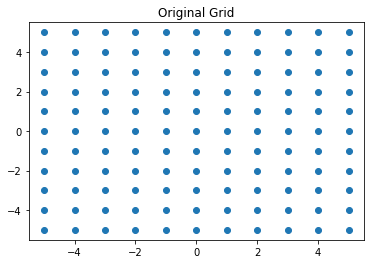

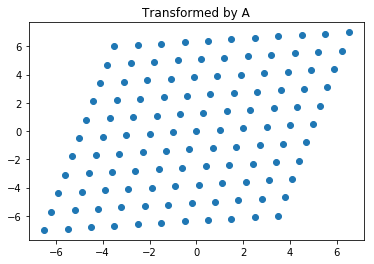

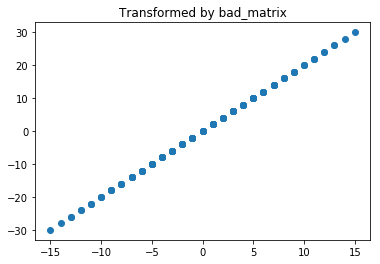

In [17]:
values = list(range(-5, 6))
x, y = np.meshgrid(values, values)
x = x.flatten()
y = y.flatten()
points = np.array([x, y])

plt.plot(points[0, :], points[1, :], 'o')
plt.title('Original Grid')
plt.show()

transformed = A.dot(points)
plt.plot(transformed[0, :], transformed[1, :], 'o')
plt.title('Transformed by A')
plt.show()

transformed = bad_matrix.dot(points)
plt.plot(transformed[0, :], transformed[1, :], 'o')
plt.title('Transformed by bad_matrix')
plt.show()

So it turns out that our bad matrix projects the entire grid onto a line, whereas A just tilts things around a little bit. This means that any point outside of the line cannot have been created by bad matrix, and thus an inverse cannot exist! (and as we saw before, several points in 2D can give us the same point on the line, which is also a problem).

This line is the **span** of our bad matrix (the set of all values it can map to). By contrast, the span of A is the entire plane, as can be guessed from the fact that it's only slightly shearing the grid.

As it turns out, matrices can only ever span linear spaces such as points, lines, planes and hyperplanes (a plane in more than 2 dimensions). Further, all these spaces always have to contain the point at the origin, since multiplying any matrix by the 0 vector always gives the 0 vector. Only matrices that span the entire space they are in have an inverse.

If we look more closely at our bad matrix, we notice something strange about its columns: the second column ([2, 4]) is exactly twice the first column ([1, 2])! As it turns out, this is exactly why our matrix doesn't span the whole space!

Multiplying a matrix and a vector can be thought of combining the columns of the matrix based on the elements of the vector, so if I multiply a matrix M by the vector [1, 2, 3, 4], the final vector is 1 times the first column of M plus 2 times the second column of M and so on. So whenever we multiply our bad matrix with a vector, the result can only ever be a multiple of the vector [1, 2], which indeed forms a line!

A set of vectors is called "dependent" if it is possible to generate one of the vectors by multiplying and adding some of the other vectors (in our case, just multiplying). If the columns of a matrix are dependent, the matrix doesn't span the whole space and can't be inverted.

Also note that if the columns of a matrix are dependent, its rows are also dependent, and vice-versa. We won't prove this here.

## Norms

Norms are a measure of the **length** of a vector. The most common types of norms are called the Lp norms, and they are of the form:
$$||x||_p = \sqrt[p]{\sum_i |x_i|^p}$$

The most common Lp norms are the L1, L2 and $L_\infty$ norms, which you might already know under the names of *Mahnattan distance* (the distance to go from the origin to the tip of the vector, if you can only move along an axis), *Euclidian distance* (the distance to go from the origin to the tip if you can go in any direction you want) and *maximum* (of the absolute values), respectively.

$L_\infty$ might seem like a weird name, but it is actually simply what happens as p reaches infinity.

You can access the norms using `np.linalg.norm`.

In [18]:
v = np.array([3, -4])
print('Vector:', v)
print('L1:', np.linalg.norm(v, 1))
print('L2:', np.linalg.norm(v, 2))
print('L inf', np.linalg.norm(v, float('inf')))

print('\nIncreasing p gets us closer to L inf')
print('L3', np.linalg.norm(v, 3.0))
print('L10', np.linalg.norm(v, 10.0))
print('L30', np.linalg.norm(v, 30.0))
print('...')

Vector: [ 3 -4]
L1: 7.0
L2: 5.0
L inf 4.0

Increasing p gets us closer to L inf
L3 4.49794144528
L10 4.02197414982
L30 4.00002380889
...


Finally note that we can measure a matrix using the same norms, but that sometimes people call norms on matrices differently! In particular, the **Frobenius** norm is simply the L2 norm applied to a matrix. Remember to use that word if you want to sound smart.

## Special matrices


- **Diagonal matrix**: only has non-zero entries on its upper left to lower right diagonal (the other diagonal doesn't count!)
 - Numpy can create a diagonal from a vector using `np.diag`.

In [19]:
np.diag([1, 2, 3, 4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

- **Symmetric matrix**: equal to its own transpose (the entries are symmetric across the up-left to down-right diagonal).
 - A matrix times its transpose is always symmetric.

In [20]:
np.random.seed(1)
M = np.random.randint(0, 5, size=(3, 3))
M.dot(M.transpose())

array([[25, 15,  4],
       [15, 10,  3],
       [ 4,  3, 17]])

- **Unit vector**: a vector whose L2 norm is 1.
 - You can make a vector into a unit vector by dividing by its L2 norm.

In [21]:
print(b, np.linalg.norm(b))
bnorm = b / np.linalg.norm(b)
print(bnorm, np.linalg.norm(bnorm))

[ 1. -2.] 2.23607
[ 0.45 -0.89] 1.0


- **Orthogonal vectors**: two vectors whose dot product is 0.
 - [0, 0] is orthogonal to every vector. Non-zero orthogonal vectors are perpendicular.

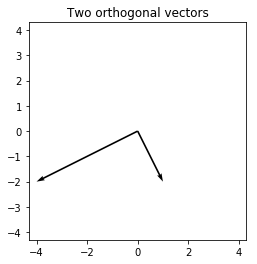

Dot product = 0.0


In [22]:
c = np.array([-4, -2])
plt.quiver([0, 0], [0, 0], [b[0], c[0]], [b[1], c[1]], angles='xy', scale_units='xy', scale=1)
plt.xlim(-4.3, 4.3)
plt.ylim(-4.3, 4.3)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Two orthogonal vectors')
plt.show()
print('Dot product =', b.dot(c))

- **Orthonormal vectors**: two unit vectors who are also orthogonal.


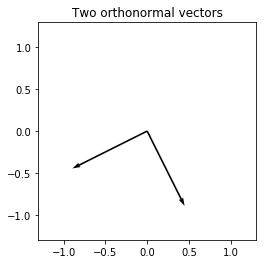

Dot product = 0.0


In [23]:
cnorm = c / np.linalg.norm(c)
plt.quiver([0, 0], [0, 0], [bnorm[0], cnorm[0]], [bnorm[1], cnorm[1]], angles='xy', scale_units='xy', scale=1)
plt.xlim(-1.3, 1.3)
plt.ylim(-1.3, 1.3)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Two orthonormal vectors')
plt.show()
print('Dot product =', bnorm.dot(cnorm))

- **Orthogonal matrix**: a matrix whose columns (and rows) are mutually ortho**normal** (yes, it is called ortho**gonal** but it is made up of ortho**normal** vectors). Amazing property: the transpose of an orthogonal matrix is its own inverse!!!

In [24]:
ortho = np.array([bnorm, cnorm])
print('An orthogonal matrix')
print(ortho)
print('Its transpose is its inverse')
print(ortho.dot(ortho.transpose()))

An orthogonal matrix
[[ 0.45 -0.89]
 [-0.89 -0.45]]
Its transpose is its inverse
[[ 1.  0.]
 [ 0.  1.]]


## Eigen-stuff

The word "eigen" can seem scary, so I like to mentally replace it with "special" (that's not what the word actually means in German, but it's good enough for our purposes). So whenever I write "eigenvector" or "eigenvalue", replace it with "special vector" and "special value".

So how are these vectors and values special? The eigenvectors are special because they only get **stretched** when they are multiplied by the matrix (ie their direction doesn't change, only their length, and they might also be going "backwards" if they are stretched by a negative amount). The eigenvalues is the amount by which the vectors are stretched.

Eigen-stuff is accessible in numpy through `np.linalg.eig`. Let's look at what they do. Below the black vector is always the original one and the red vector is the transformed one.

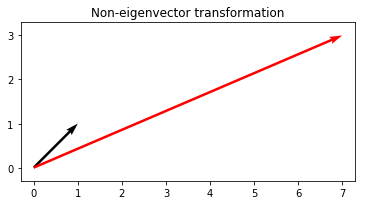

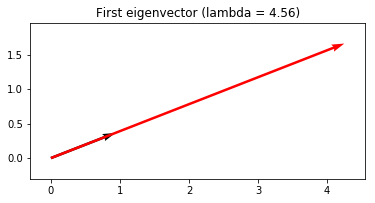

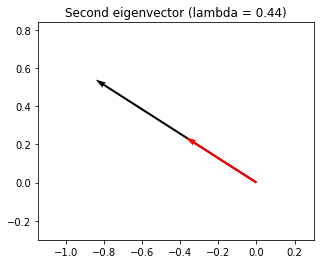

In [64]:
def eig_show(v, title):
    dest = B.dot(v)
    plt.quiver([0, 0], [0, 0], [v[0], dest[0]], [v[1], dest[1]], angles='xy', scale_units='xy', scale=1, color=['k', 'r'])
    plt.xlim(min(v[0], dest[0], 0) - 0.3, max(v[0], dest[0], 0) + 0.3)
    plt.ylim(min(v[1], dest[1], 0) - 0.3, max(v[1], dest[1], 0) + 0.3)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(title)
    plt.show()    

eig_show([1, 1], 'Non-eigenvector transformation')
    
diag, V = np.linalg.eig(B)
eig_show(V[:, 0], f'First eigenvector (lambda = {diag[0]:.2f})')
eig_show(V[:, 1], f'Second eigenvector (lambda = {diag[1]:.2f})')

Here we see that the first (arbitrary) vector is not just stretched, but also slightly rotated by the matrix, so it clearly isn't an eigenvector. We compute the eigenvectors and show how they get transformed and indeed they do not change direction! We also see that in the first case the transformed vector is much longer than the original vector, and in the second case it is much shorter, so the amount of stretching is per-vector.

Now the two important questions are:
- Does every matrix have eigenvectors and eigenvalues, and if so how many?
- What is the point of all of this?

The answer for the first question is... sorta. Given the definition we have given so far, the answer should be an emphatic "no", because there exist *rotation* matrices, which always rotate a given vector. Since we have defined eigenvectors as "vectors that don't get rotated when they are multiplied with the matrix" and since rotation matrices rotate every vector, they should not have any eigenvectors. However, if you call `np.linalg.eig` on a rotation matrix such as \[\[0, -1\], \[1, 0\]\] (which rotates vectors by 90 degrees), you will find that it won't error out! The reason is that if you use *complex* eigenvalues and eigenvectors, you can find eigen-stuff for every possible matrix. 

Having to deal with complex numbers is not very convenient, of course. Thankfully, many of the matrices we'll encounter in practice will have real eigenvalues and eigenvectors.

Now as to what the point of all this is. It so happens that we can decompose a matrix using its eigenvectors. Specifically, if we have a matrix A, we can put all its eigenvectors in the columns of a matrix V and all its eigenvalues along the diagonal of a diagonal matrix $\Lambda$ and we find that:
$$A = V \Lambda V^{-1}$$

An important way in which this is useful is that it allows us to multiply a matrix with itself repeatedly very efficiently: when we multiply A with itself, the $V^{-1}$ of the leftmost decomposition cancels out the $V$ of the rightmost decomposition, and we end up with:
$$A^n = V \Lambda^n V^{-1}$$

Because $\Lambda$ is a diagonal matrix, taking it to a power simply involves taking each of its elements to that power, which is much faster than doing a lot of matrix multiplications.

In [69]:
print('Original B')
print(B)
print('Reconstructed B')
print(V.dot(np.diag(diag)).dot(np.linalg.inv(V)))

Original B
[[ 3.  4.]
 [ 1.  2.]]
Reconstructed B
[[ 3.  4.]
 [ 1.  2.]]


Finally we should note that for all **symmetric** matrices, the eigenvector matrix is orthogonal, which means that its transpose is its own inverse, so we get:
$$A = Q \Lambda Q^T$$

If A is symmetric, which is particularly useful.

## SVD and pseudoinverse

In the previous section we found that eigenvalues were convenient but sadly didn't apply to all matrices: specifically, for some real square matrices they required the use of complex numbers, and they of course don't work at all for non-square matrices.

Singular value decomposition (SVD) tries to solve this problem by providing a decomposition with two orthogonal matrices (U and V) and one diagonal matrix (D), such that:
$$A = UDV^T$$

The book does not go into many details about the uses of SVD (though there are many) except for finding the Moore-Penrose pseudoinverse.

SVD can be accessed using `np.linalg.svd`.

In [89]:
rect = np.array([[1, 1], [3, 1], [-1, 4]], dtype=np.float32)
print('Original')
print(rect)
U, diag, V = np.linalg.svd(rect, full_matrices=True)
D = np.zeros((3, 2))
D[:2, :2] = np.diag(diag)
print('Reconstructed')
print(U.dot(D).dot(V.transpose()))

Original
[[ 1.  1.]
 [ 3.  1.]
 [-1.  4.]]
Reconstructed
[[ 1.  1.]
 [ 3.  1.]
 [-1.  4.]]


The Moore-Penrose pseudoinverse can be computed using SVD. How doesn't matter too much here, the point is what it can do: basically it can find the an "inverse" for non-invertible matrices. Of course, because they are not invertible, the "inverse" will lack some properties, but it will still be quite useful.

As you might recal, the inverse was useful for solving equations like:
$$Ax = b$$
In which case you could find x using:
$$x = A^{-1}b$$

With the non-invertible, there might not be an x that satisfies $Ax = b$, but the pseudoinverse can find the x that comes **closest** (by minimizing the L2 distance between Ax and b).

The Moore-Penrose pseudoinverse is accessible by using `np.linalg.pinv`.

In [95]:
print('Matrix A (bad)')
print(bad_matrix)
print('\nTarget')
print(b)
print('\nPseudoinverse')
print(np.linalg.pinv(bad_matrix))

x = np.linalg.pinv(bad_matrix).dot(b)
print('\nx')
print(x)
print('\nAx')
print(bad_matrix.dot(x))

Matrix A (bad)
[[1 2]
 [2 4]]

Target
[ 1. -2.]

Pseudoinverse
[[ 0.04  0.08]
 [ 0.08  0.16]]

x
[-0.12 -0.24]

Ax
[-0.6 -1.2]


## Trace and determinant

The trace is simply an operator that sums the entries along the diagonals of a matrix. It has some interesting properties (eg the trace of a transpose is the same as the original trace and the order of matrix multiplication doesn't matter within the trace operator), and its main use is to simplify some math by getting rid of explicit summing in equations in some cases.

It is accessible as np.trace

In [99]:
print('A')
print(A)
print('\nTr(A)')
print(np.trace(A))

A
[[ 1.   0.3]
 [ 0.1  1.3]]

Tr(A)
2.3


The determinant is explained very quickly in the book, although it has many interesting properties. Suffice it to say that it is a single number that describes a matrix, it has the following properties:
- If det(A) is 0, then A is singular
- It is the product of the eigenvalues
- It can be thought of as the amount to which multiplying by the matrix streches space: if the determinant is 2, then the matrix can be thought of as doubling the volume of space. If it is one, it doesn't stretch space at all.

Finally, the chapter ends on a derivation of PCA with a single component. It is a cool example of derivation but I won't go through it here since it doesn't really introduce new material, just shows how to use what we saw above.

That's it for this week's notes. I think I'll keep translating the book's concepts into python code, it enlivens things a bit and makes them more concrete, but maybe next time's notes will be shorter: this was a lot of work!